 ## EELT 7023 - Tópicos Especiais em Identificação de Sistemas

#### Aluno: Rafael Luiz B. Stonoga

### $$\textbf{Exercício 5}$$

$\textbf{Objetivo:}$ Gerar o conjunto de dados de $\omega_k$ e $G(j\omega_k)$, com $k = 1, \cdots, 1000$.

Deseja-se que os $1000$ valores de $\omega_k$ estejam distribuídos em escala logarítmica no intervalo $[0,01; 10]\frac{rad}{s}$. 

A função de transferência $G(s)$ é dada por

$$G(s) = \frac{2s}{1+2s+6s^2}$$

onde $s$ é a frequência complexa da transformada de Laplace e pode ser substituída por $j\omega$.

$\textbf{Resolução:}$ Primeiramente foi necessário definir um a maneira de criar um array com valores em escala logarítmica, pois Julia não possui uma função $logspace$ nativa, pelo menos não na sua versão $1.4.2$, que é a que está sendo utilizada no momento da redação desse relatório.

In [1]:
LogSpace(start, stop, steps) = [10^i for i in range(log10(start), log10(stop), length=steps)]

LogSpace (generic function with 1 method)

Em seguida foi criado um vetor com os valores de $\omega_k$ juntamente com os correspondentes valores da função de transferência $G(s)$.

In [2]:
total_points = 1000;

# Criação do vetor das frequências
ω_start, ω_stop = 0.01, 10;

ω =LogSpace(ω_start, ω_stop, total_points);

num = [0, 2];
den = [1, 2, 6];

numerador = zeros(total_points);
denominador = zeros(total_points);

#numerador .+ ((ω * 1im) .^ (2) * num[2])

# A notação de Julia para valores imaginários é "im" no lugar do tradicional "j"
for n=1:length(num)
    numerador = numerador .+ (ω * 1im).^(n - 1) * num[n];
end
for d=1:length(den)
    denominador = denominador .+ (ω * 1im).^(d - 1) * den[d];
end

G = numerador ./ denominador;

Por fim, foram plotados os gráficos da magnitude e do ângulo de $G(j\omega)$

In [3]:
G_mag = abs.(G);
G_phase = angle.(G) * 180 / pi;

In [4]:
# Biblioteca necessária para plotar gráficos
using Plots
pyplot()

Plots.PyPlotBackend()

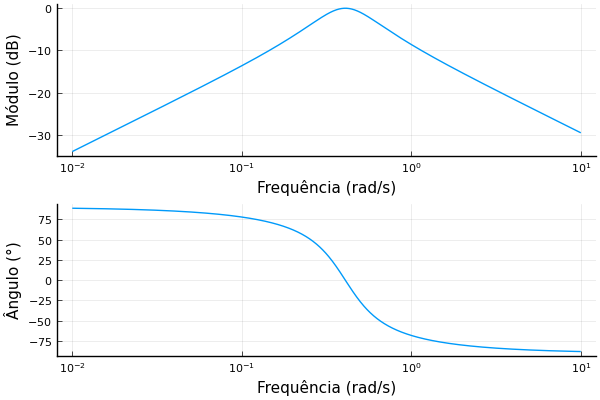

In [5]:
plot_mag = plot(ω, 20*log10.(G_mag), xlabel="Frequência (rad/s)", yaxis="Módulo (dB)", xaxis=:log)
plot_pha = plot(ω, G_phase, xlabel="Frequência (rad/s)", yaxis="Ângulo (°)", xaxis=:log)

plot(plot_mag, plot_pha, layout=(2,1), legend=false)

É possível observar que os gráficos estão semelhantes aos apresentados durante a Videoaula 7.